# Segmenting and Clustering Neighboroods in Toronto

## Getting and cleaning the data

### 1) Scraping the table from Wikipedia

No need to use Beautiful Soup to import the dataframe, as Pandas has a useful `read.html` function which returns a list containing all the tables in a page, already converted into DataFrames.

In [1]:
import pandas as pd

In [2]:
url  = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [3]:
#resetting to default the number of rows displayed on output
pd.reset_option("display.max_rows")
dfs = pd.read_html(url)
dfs

[                                                    0  \
 0                                     M1ANot assigned   
 1                     M1BScarborough(Malvern / Rouge)   
 2   M1CScarborough(Rouge Hill / Port Union / Highl...   
 3   M1EScarborough(Guildwood / Morningside / West ...   
 4                              M1GScarborough(Woburn)   
 5                           M1HScarborough(Cedarbrae)   
 6                 M1JScarborough(Scarborough Village)   
 7   M1KScarborough(Kennedy Park / Ionview / East B...   
 8   M1LScarborough(Golden Mile / Clairlea / Oakridge)   
 9   M1MScarborough(Cliffside / Cliffcrest / Scarbo...   
 10       M1NScarborough(Birch Cliff / Cliffside West)   
 11  M1PScarborough(Dorset Park / Wexford Heights /...   
 12                 M1RScarborough(Wexford / Maryvale)   
 13                          M1SScarborough(Agincourt)   
 14  M1TScarborough(Clarks Corners / Tam O'Shanter ...   
 15  M1VScarborough(Milliken / Agincourt North / St...   
 16     M1WSca

The table is indexed as the first data frame in the list.

In [4]:
toronto_pc = dfs[0]
toronto_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Postal Code    180 non-null    object
 1   Borough        180 non-null    object
 2   Neighbourhood  180 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


We have to process only the cells that have an assigned borough and ignore cells with a borough that is 'Not Assigned'.

In [5]:
toronto_pc= toronto_pc[toronto_pc.Borough != 'Not assigned']
toronto_pc

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [4]:
toronto_pc.loc[toronto_pc.Neighbourhood =='Not assigned']

NameError: name 'toronto_pc' is not defined

In [7]:
#Checking that every row contains a different Postal Code
toronto_pc['Postal Code'].nunique() == len(toronto_pc)

True

In [8]:
#cleaning the index 
# the parameter drop =True avoids to create a new index columns with the old values;
toronto_pc.reset_index(inplace = True, drop = True) 
toronto_pc

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


### 2) Fetching Coordinates

Since the geocoder package seems to show many issues, I will use the package pgeocode to import the coordinates. After setting the local ('ca'), this library returns a Pandas Data Frame in answer to a Postal Code query. From this data frame we will select only the data pertaining latitude and longitude.

In [9]:
!pip install pgeocode
import pgeocode 

nomi = pgeocode.Nominatim('ca')

Latitude = []
Longitude = []

for pc in toronto_pc['Postal Code']:
    query = nomi.query_postal_code(pc)
    Latitude.append(query.latitude)
    Longitude.append(query.longitude)

In [10]:
#assigning the coordinates to new columns in the existing dataframe
toronto_pc.loc[:,'Latitude'] = Latitude
toronto_pc.loc[:,'Longitude'] = Longitude
toronto_pc

C:\Users\d\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\d\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7545,-79.3300
1,M4A,North York,Victoria Village,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.6518,-79.5076
99,M4Y,Downtown Toronto,Church and Wellesley,43.6656,-79.3830
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.7804,-79.2505
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.6325,-79.4939


We got a common warning in Pandas, but we can ignore that. The list of coordinates seems correctly placed. 

In [11]:
toronto_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Postal Code    103 non-null    object 
 1   Borough        103 non-null    object 
 2   Neighbourhood  103 non-null    object 
 3   Latitude       102 non-null    float64
 4   Longitude      102 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.1+ KB


We got just one Nan:

In [12]:
toronto_pc[toronto_pc.isnull().any(axis = 1)]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
76,M7R,Mississauga,Canada Post Gateway Processing Centre,NaN,NaN


We can retrieve the coordinates manuamlly from Google Maps :

In [13]:
ll = 43.63657950496381, -79.61576357177279

In [14]:
#set the values
toronto_pc.at[76, 'Latitude'] = ll[0]
toronto_pc.at[76,'Longitude'] = ll[1]

In [15]:
toronto_pc.isnull().any(axis = 0)

Postal Code      False
Borough          False
Neighbourhood    False
Latitude         False
Longitude        False
dtype: bool

In [16]:
#checking if the values are correctly set
toronto_pc.iloc[76]

Postal Code                                        M7R
Borough                                    Mississauga
Neighbourhood    Canada Post Gateway Processing Centre
Latitude                                      43.63658
Longitude                                   -79.615764
Name: 76, dtype: object

In [17]:
toronto_pc

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7545,-79.3300
1,M4A,North York,Victoria Village,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.6518,-79.5076
99,M4Y,Downtown Toronto,Church and Wellesley,43.6656,-79.3830
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.7804,-79.2505
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.6325,-79.4939


Let's examine how then neighbourhoods are distributed by borough, that will be useful later to decide how many cluster do we need:

In [18]:
print(toronto_pc.groupby(['Borough'])['Borough'].count())
print()
print(toronto_pc.groupby(['Borough'])['Borough'].count().describe())

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Borough, dtype: int64

count    10.000000
mean     10.300000
std       7.469196
min       1.000000
25%       5.000000
50%       7.500000
75%      15.750000
max      24.000000
Name: Borough, dtype: float64


## Clustering

Importing the libraries needed for visualization and clustering:

In [19]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library
#library needed to get Toronto coordinates:
!pip install geopy
from geopy.geocoders import Nominatim
print('Libraries imported.')

Libraries imported.


In order to define an instance of the geocoder, we need to define a user_agent:

In [20]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Creating a map of Toronto with neighborhoods superimposed:


In [21]:
toronto_map= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_pc['Latitude'], toronto_pc['Longitude'], toronto_pc['Borough'], toronto_pc['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

We are now ready to set up the Foursquare API to make queries.

 ### 1) Defining Foursquare API credentials and parameters

Since I believe working with the URL as suggested in the course to make an API is overtly complicated, I decided to use this line of code (found here : https://developer.foursquare.com/docs/places-api/getting-started/). In place of filling the URL directly with the parameters, we will create a dictionary of the parameters which we will place inside a GET request (much neater).

In [22]:
import json, requests
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id='TDUMTXN0WG4EZFIPJBH5FUG1YXLZCMFQXJTWNEZ2RSJ14W3S',
client_secret='1FEIJEA0NXDXAONICQ55E53CPLUUWHQ4FNDWJIP0V1TGO1XU',
v='20180323',
ll='43.6534817,-79.3839347',
limit=1
)
#testing a query
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)

I willl borrow the function **getNearbyVenues**  used in the Lab to loop 'explore' queries through the neighboroods and get the corresponding venues.

In [23]:
#since we have 103 different neighboroods, we are setting the query limit to 50 so as not to exceed tha API call limit
params['limit'] = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
        
        #modify the coordinates
        params['ll'] = str(lat)+','+str(lng)
            
        # make the GET request
        results = requests.get(url, params).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
toronto_venues = getNearbyVenues(toronto_pc.Neighbourhood, toronto_pc.Latitude, toronto_pc.Longitude, radius=500)

In [25]:
toronto_venues.head()
toronto_venues['Venue'].describe(include='all')
# many venues are not unique to one neighborhood


count         10071
unique         2982
top       Starbucks
freq            275
Name: Venue, dtype: object

In [26]:

print(toronto_venues.groupby('Neighborhood').count()['Venue'])
print()
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

Neighborhood
Agincourt                                          100
Alderwood, Long Branch                             100
Bathurst Manor, Wilson Heights, Downsview North     96
Bayview Village                                    100
Bedford Park, Lawrence Manor East                  100
                                                  ... 
Willowdale, Willowdale West                        100
Woburn                                             100
Woodbine Heights                                   100
York Mills West                                    100
York Mills, Silver Hills                           100
Name: Venue, Length: 99, dtype: int64

There are 335 uniques categories.


### 2) Analyzing the most frequent venues

In [27]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] =toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
toronto_onehot.shape

(10071, 335)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [29]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,Agincourt,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.02,0.000000,0.0,0.0,0.01,0.00,0.00,0.00,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.0,0.0,...,0.0,0.01,0.010000,0.0,0.0,0.01,0.00,0.00,0.01,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.010417,0.0,0.00,0.0,0.0,...,0.0,0.00,0.010417,0.0,0.0,0.00,0.00,0.00,0.00,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.01,0.01,0.00,0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.01,0.000000,0.0,0.0,0.01,0.00,0.00,0.00,0.0
95,Woburn,0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.01,0.00,0.0
96,Woodbine Heights,0.0,0.0,0.0,0.0,0.000000,0.0,0.02,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.0
97,York Mills West,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.01,0.0


#### Let's print each neighborhood along with the top 5 most common venues


In [30]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    ##print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [32]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Restaurant,Caribbean Restaurant,Clothing Store,Coffee Shop,Supermarket,Indian Restaurant,Gas Station,Bank,Bakery
1,"Alderwood, Long Branch",Coffee Shop,Bakery,Burger Joint,Breakfast Spot,Seafood Restaurant,Park,Liquor Store,Café,Burrito Place,Furniture / Home Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Sandwich Place,Restaurant,Deli / Bodega,Park,Greek Restaurant,Gym,Turkish Restaurant,Grocery Store,Racetrack
3,Bayview Village,Coffee Shop,Bank,Pizza Place,Sandwich Place,Chinese Restaurant,Korean Restaurant,Liquor Store,Pharmacy,Bubble Tea Shop,Supermarket
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Clothing Store,Italian Restaurant,Bakery,Sushi Restaurant,Bagel Shop,Café,Asian Restaurant,Toy / Game Store,Bookstore


### 3) Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 6 clusters.


In [33]:
from sklearn.cluster import KMeans

# set number of clusters, 1 per borough
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
print(kmeans.inertia_)



[3 5 2 0 4 2 5 1 3 1]
1.0587348085851644


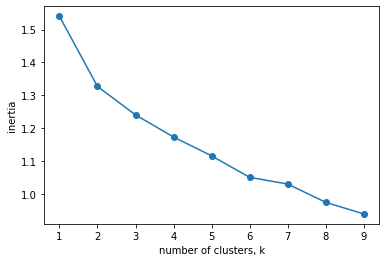

In [34]:
#a good cluster has tight clusters(low inertia) but also not too many clusters! A good rule of thumb is choosing the "elbow" value in the inertia plot

import matplotlib.pyplot as plt
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(toronto_grouped_clustering)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()   

C:\Users\d\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\d\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


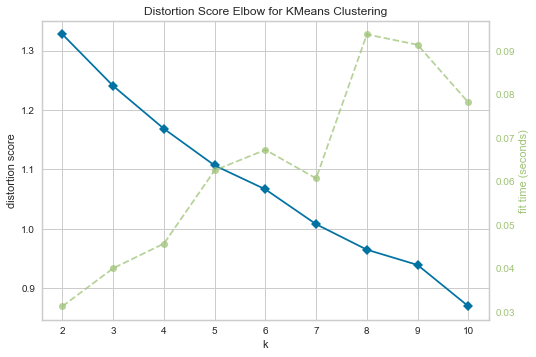

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# trying the kelbow visualizeb
#!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster.elbow import KElbowVisualizer
model = KMeans()
visualizer= KElbowVisualizer(model, k=10)
visualizer.fit(toronto_grouped_clustering)
visualizer.show()

In [36]:
# kmeans elbow not present. 

In [37]:
toronto_grouped_clustering

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.02,0.000000,0.0,0.0,0.01,0.00,0.00,0.00,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.0,0.0,0.0,...,0.0,0.01,0.010000,0.0,0.0,0.01,0.00,0.00,0.01,0.0
2,0.0,0.0,0.0,0.0,0.010417,0.0,0.00,0.0,0.0,0.0,...,0.0,0.00,0.010417,0.0,0.0,0.00,0.00,0.00,0.00,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.01,0.01,0.00,0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.01,0.000000,0.0,0.0,0.01,0.00,0.00,0.00,0.0
95,0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.01,0.00,0.0
96,0.0,0.0,0.0,0.0,0.000000,0.0,0.02,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.0
97,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.01,0.0


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_pc

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.7545,-79.3300,5,Middle Eastern Restaurant,Coffee Shop,Chinese Restaurant,Supermarket,Grocery Store,Japanese Restaurant,Café,Burger Joint,Bakery,Restaurant
1,M4A,North York,Victoria Village,43.7276,-79.3148,5,Middle Eastern Restaurant,Grocery Store,Coffee Shop,Supermarket,Bank,Bakery,Restaurant,Discount Store,Indian Restaurant,Department Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,2,Coffee Shop,Café,Theater,Restaurant,Bakery,Farmers Market,Diner,Pub,Park,Gastropub
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504,3,Clothing Store,Coffee Shop,Bank,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Restaurant,Sandwich Place,Liquor Store,Sushi Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889,2,Coffee Shop,Sushi Restaurant,Gym,Café,Japanese Restaurant,Diner,Hotel,Yoga Studio,Mediterranean Restaurant,Ramen Restaurant


Finally, let's visualize the resulting clusters :


In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4) Examine Clusters


Finally let's check the discriminating categories between each cluster, based on the first three most common venues:

In [40]:
toronto_merged.groupby('Cluster Labels')[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue']].describe()

1st Most Common Venue                                  \
                               count unique                 top freq   
Cluster Labels                                                         
0                                 18      3         Coffee Shop   14   
1                                 18      7                Café    5   
2                                 18      4         Coffee Shop   12   
3                                 15      5  Chinese Restaurant    7   
4                                 17      4         Coffee Shop    8   
5                                 17      5         Coffee Shop   10   

               2nd Most Common Venue                                  \
                               count unique                 top freq   
Cluster Labels                                                         
0                                 18     11               Hotel    3   
1                                 18      7         Coffee Shop    8   
2                                 18     10         Coffee Shop    6   
3                                 15      8      Clothing Store    5   
4                                 17      7  Italian Restaurant    8   
5                                 17     10         Coffee Shop    4   

               3rd Most Common Venue                                     
                               count unique                    top freq  
Cluster Labels                                                           
0                                 18     10         Sandwich Place    8  
1                                 18     11                   Café    4  
2                                 18      9                   Café    5  
3                                 15      9  Vietnamese Restaurant    6  
4                                 17      7                 Bakery    5  
5                                 17     12                   Park    3

In [41]:
toronto_merged[toronto_merged['Cluster Labels']==3]


,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504,3,Clothing Store,Coffee Shop,Bank,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Restaurant,Sandwich Place,Liquor Store,Sushi Restaurant
10,M6B,North York,Glencairn,43.7081,-79.4479,3,Clothing Store,Furniture / Home Store,Coffee Shop,Restaurant,Bakery,Women's Store,Dessert Shop,Middle Eastern Restaurant,Men's Store,Toy / Game Store
26,M1H,Scarborough,Cedarbrae,43.7686,-79.2389,3,Chinese Restaurant,Indian Restaurant,Coffee Shop,Sandwich Place,Caribbean Restaurant,Restaurant,Pharmacy,Clothing Store,Gas Station,Bank
27,M2H,North York,Hillcrest Village,43.8015,-79.3577,3,Chinese Restaurant,Bakery,Japanese Restaurant,Coffee Shop,Caribbean Restaurant,Pharmacy,Bank,Grocery Store,Park,Sushi Restaurant
40,M3K,North York,Downsview,43.7390,-79.4692,3,Coffee Shop,Clothing Store,Vietnamese Restaurant,Sandwich Place,Grocery Store,Restaurant,Bank,Pizza Place,Cosmetics Shop,Furniture / Home Store
46,M3L,North York,Downsview,43.7334,-79.5116,3,Coffee Shop,Clothing Store,Vietnamese Restaurant,Sandwich Place,Grocery Store,Restaurant,Bank,Pizza Place,Cosmetics Shop,Furniture / Home Store
49,M6L,North York,"North Park, Maple Leaf Park, Upwood Park",43.7137,-79.4869,3,Furniture / Home Store,Clothing Store,Vietnamese Restaurant,Coffee Shop,Restaurant,Fast Food Restaurant,Sandwich Place,Italian Restaurant,Bank,Turkish Restaurant
53,M3M,North York,Downsview,43.7319,-79.4928,3,Coffee Shop,Clothing Store,Vietnamese Restaurant,Sandwich Place,Grocery Store,Restaurant,Bank,Pizza Place,Cosmetics Shop,Furniture / Home Store
60,M3N,North York,Downsview,43.7568,-79.5210,3,Coffee Shop,Clothing Store,Vietnamese Restaurant,Sandwich Place,Grocery Store,Restaurant,Bank,Pizza Place,Cosmetics Shop,Furniture / Home Store
65,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.7612,-79.2707,3,Chinese Restaurant,Coffee Shop,Bookstore,Restaurant,Bakery,Supermarket,Burger Joint,Pharmacy,Clothing Store,Caribbean Restaurant


In [42]:
toronto_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.7545,-79.3300,5,Middle Eastern Restaurant,Coffee Shop,Chinese Restaurant,Supermarket,Grocery Store,Japanese Restaurant,Café,Burger Joint,Bakery,Restaurant
1,M4A,North York,Victoria Village,43.7276,-79.3148,5,Middle Eastern Restaurant,Grocery Store,Coffee Shop,Supermarket,Bank,Bakery,Restaurant,Discount Store,Indian Restaurant,Department Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,2,Coffee Shop,Café,Theater,Restaurant,Bakery,Farmers Market,Diner,Pub,Park,Gastropub
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504,3,Clothing Store,Coffee Shop,Bank,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Restaurant,Sandwich Place,Liquor Store,Sushi Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889,2,Coffee Shop,Sushi Restaurant,Gym,Café,Japanese Restaurant,Diner,Hotel,Yoga Studio,Mediterranean Restaurant,Ramen Restaurant


In [43]:
df_labels = pd.crosstab(toronto_merged['Cluster Labels'], toronto_merged['1st Most Common Venue'])
df_labels

1st Most Common Venue,Bakery,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Furniture / Home Store,Greek Restaurant,Hotel,Italian Restaurant,Korean Restaurant,Middle Eastern Restaurant,Park,Pharmacy,Restaurant,Zoo Exhibit
Cluster Labels,,,,,,,,,,,,,,,
0,0,0,0,0,14,0,0,0,0,0,0,0,1,0,3
1,2,5,0,0,3,0,2,0,2,0,0,3,0,1,0
2,0,1,0,0,12,0,0,3,0,2,0,0,0,0,0
3,1,0,7,2,4,1,0,0,0,0,0,0,0,0,0
4,0,2,0,0,8,0,0,0,6,0,0,1,0,0,0
5,0,0,1,0,10,0,0,1,0,0,4,1,0,0,0


In [44]:
df_lt = df_labels.transpose()
df_lt["total"] = df_lt.sum(axis="columns")
df_lt = df_lt.sort_values("total", ascending=False)
df_lt

Cluster Labels,0,1,2,3,4,5,total
1st Most Common Venue,,,,,,,
Coffee Shop,14,3,12,4,8,10,51
Café,0,5,1,0,2,0,8
Chinese Restaurant,0,0,0,7,0,1,8
Italian Restaurant,0,2,0,0,6,0,8
Park,0,3,0,0,1,1,5
Hotel,0,0,3,0,0,1,4
Middle Eastern Restaurant,0,0,0,0,0,4,4
Bakery,0,2,0,1,0,0,3
Zoo Exhibit,3,0,0,0,0,0,3


In [45]:
#dropping the 'total' colum before plotting
df_lt = df_lt.drop("total",axis=1)

<AxesSubplot:xlabel='1st Most Common Venue'>

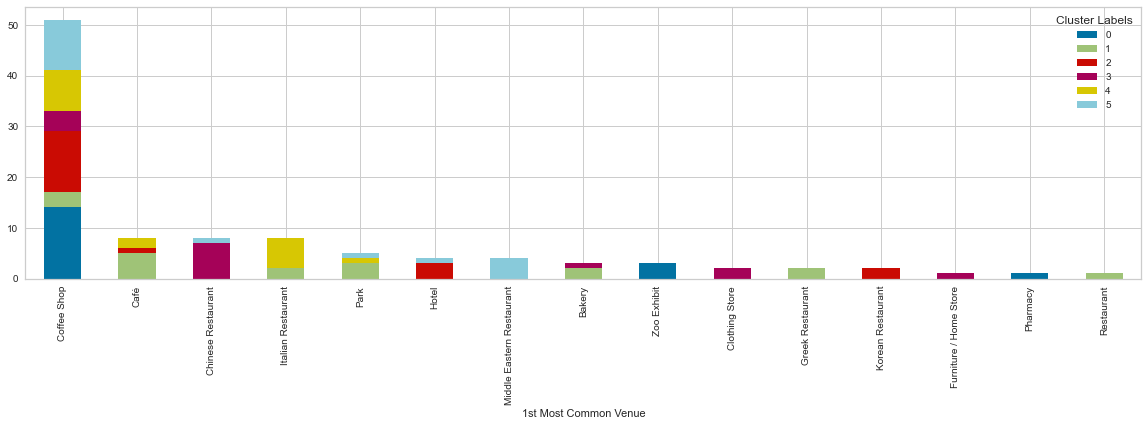

In [46]:
df_lt.plot(kind='bar',figsize=(20,5), rot=90, stacked=True)

In [47]:
vc = toronto_merged[["Cluster Labels", "1st Most Common Venue"]].value_counts()


In [48]:
type(vc)

pandas.core.series.Series

In [49]:
vc = vc.sort_index()
vc

Cluster Labels  1st Most Common Venue    
0               Coffee Shop                  14
                Pharmacy                      1
                Zoo Exhibit                   3
1               Bakery                        2
                Café                          5
                Coffee Shop                   3
                Greek Restaurant              2
                Italian Restaurant            2
                Park                          3
                Restaurant                    1
2               Café                          1
                Coffee Shop                  12
                Hotel                         3
                Korean Restaurant             2
3               Bakery                        1
                Chinese Restaurant            7
                Clothing Store                2
                Coffee Shop                   4
                Furniture / Home Store        1
4               Café                          

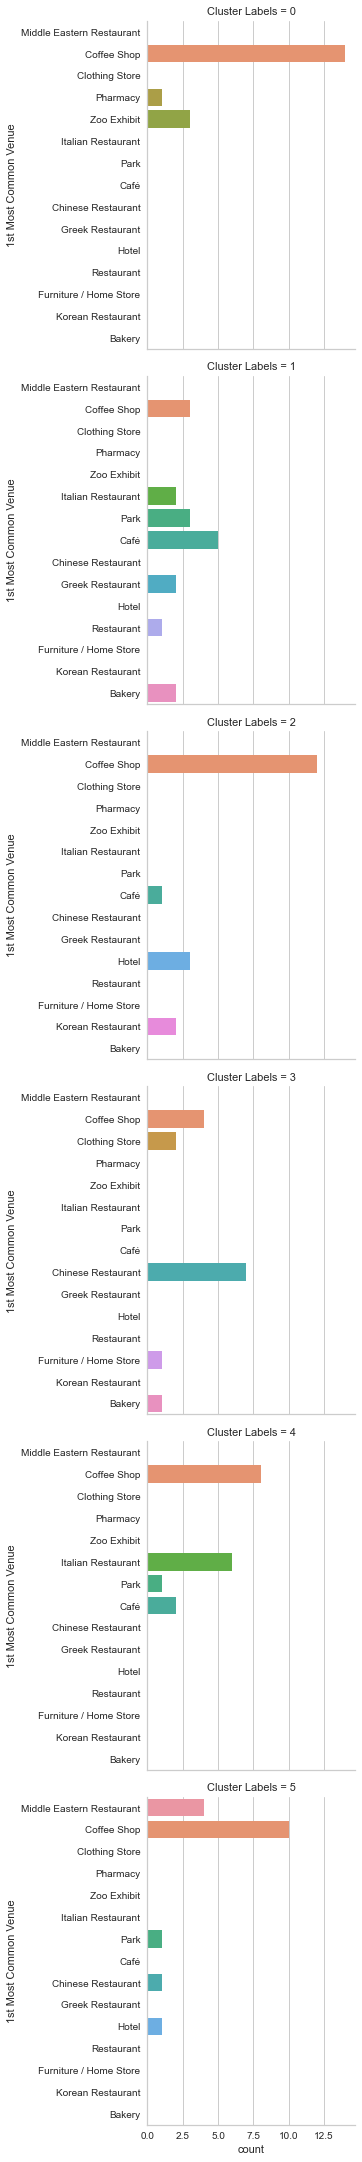

In [50]:
#experimenting with seaborn
import seaborn as sns
sns.catplot(y='1st Most Common Venue', data = toronto_merged, row='Cluster Labels', kind='count')

In [51]:
df_np = pd.read_csv('neighborhood_profile_tidy.csv',index_col=0)

In [52]:
df_np.shape

(140, 2382)

In [53]:
pd.reset_option("display.max.rows")
grouped = toronto_venues.groupby(['Neighborhood','Venue Category']).agg(count = pd.NamedAgg('Venue Category','count')).sort_values(['Neighborhood','count'],ascending=[True,False])
grouped.loc['Commerce Court, Victoria Hotel']

,count
Venue Category,
Hotel,8
Coffee Shop,7
Café,6
Restaurant,5
Gym,4
American Restaurant,3
Italian Restaurant,3
Japanese Restaurant,3
Seafood Restaurant,3
